In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load data from the specified Excel file and sheet
file_name = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\PIB Municipal\PIB MT - MS.xlsx"
sheet_name = 'Planilha2'
df = pd.read_excel(file_name, sheet_name=sheet_name)

In [3]:
# --- Data Preparation ---
# Filter the DataFrame for each state and remove any rows with missing CAGR values
df_mt = df[df['Estado'] == 'MT'].copy()
df_ms = df[df['Estado'] == 'MS'].copy()

# Remove any rows with NaN values in CAGR column
df_mt = df_mt.dropna(subset=['CAGR'])
df_ms = df_ms.dropna(subset=['CAGR'])

# Get the regions and CAGR values for each state
mt_regions = df_mt['Região Imediata'].tolist()
mt_cagr = (df_mt['CAGR'] * 100).tolist()  # Convert to percentage

ms_regions = df_ms['Região Imediata'].tolist()
ms_cagr = (df_ms['CAGR'] * 100).tolist()  # Convert to percentage

# --- Function to create radar chart for a single state ---
def create_radar_data(regions, values):
    """
    Create radar chart data for a single state
    Returns angles and values with proper closure for polygon
    """
    num_vars = len(regions)
    # Calculate angles for each region
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the polygon by adding the first angle and value at the end
    angles += angles[:1]
    values += values[:1]
    
    return angles, values, regions

# Create radar data for each state
mt_angles, mt_values, mt_labels = create_radar_data(mt_regions, mt_cagr)
ms_angles, ms_values, ms_labels = create_radar_data(ms_regions, ms_cagr)

Graph saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Graph_CAGR(MT-MS).jpg


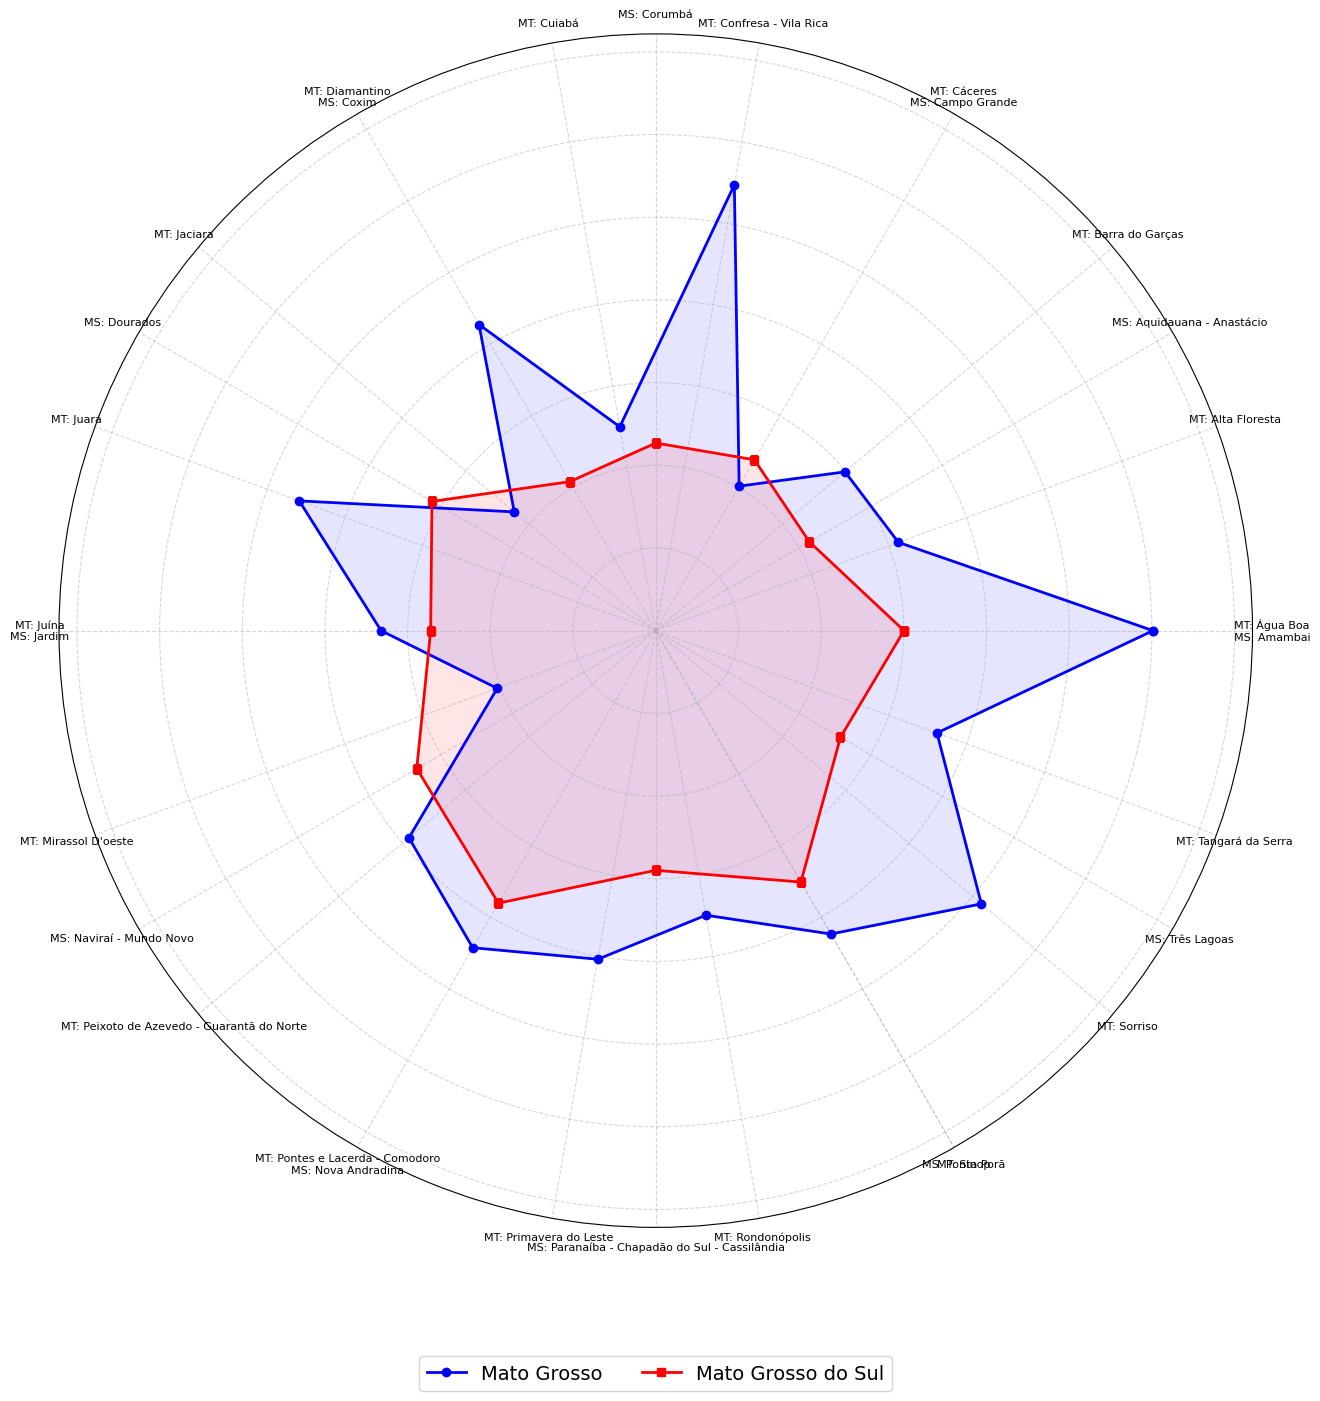

Summary:
MT has 18 immediate regions
MS has 12 immediate regions
MT regions: Água Boa, Alta Floresta, Barra do Garças, Cáceres, Confresa - Vila Rica, Cuiabá, Diamantino, Jaciara, Juara, Juína, Mirassol D'oeste, Peixoto de Azevedo - Guarantã do Norte, Pontes e Lacerda - Comodoro, Primavera do Leste, Rondonópolis, Sinop, Sorriso, Tangará da Serra
MS regions: Amambai, Aquidauana - Anastácio, Campo Grande, Corumbá, Coxim, Dourados, Jardim, Naviraí - Mundo Novo, Nova Andradina, Paranaíba - Chapadão do Sul - Cassilândia, Ponta Porã, Três Lagoas


In [4]:
# --- Combined plot with separate polygons ---
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw={'polar': True})

# Plot MT polygon
ax.plot(mt_angles, mt_values, 'o-', linewidth=2, label='Mato Grosso', color='blue')
ax.fill(mt_angles, mt_values, 'blue', alpha=0.1)

# Plot MS polygon
ax.plot(ms_angles, ms_values, 's-', linewidth=2, label='Mato Grosso do Sul', color='red')
ax.fill(ms_angles, ms_values, 'red', alpha=0.1)

# Customize combined plot
max_value = max(max(mt_values[:-1]), max(ms_values[:-1]))
ax.set_ylim(0, max_value * 1.2)

# Create combined labels for both states
all_angles = sorted(set(mt_angles[:-1] + ms_angles[:-1]))
combined_labels = []

for angle in all_angles:
    labels_at_angle = []
    if angle in mt_angles[:-1]:
        idx = mt_angles[:-1].index(angle)
        labels_at_angle.append(f"MT: {mt_labels[idx]}")
    if angle in ms_angles[:-1]:
        idx = ms_angles[:-1].index(angle)
        labels_at_angle.append(f"MS: {ms_labels[idx]}")
    combined_labels.append('\n'.join(labels_at_angle))

ax.set_xticks(all_angles)
ax.set_xticklabels(combined_labels, fontsize=8)
ax.set_yticklabels([])
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=14, ncol=2)

plt.tight_layout()

# Save the figure with high resolution
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Graph_CAGR(MT-MS).jpg"
plt.savefig(save_path, dpi=1800, bbox_inches='tight', format='jpg')
print(f"Graph saved to: {save_path}")

plt.show()

# --- Print summary information ---
print("Summary:")
print(f"MT has {len(mt_regions)} immediate regions")
print(f"MS has {len(ms_regions)} immediate regions")
print(f"MT regions: {', '.join(mt_regions)}")
print(f"MS regions: {', '.join(ms_regions)}")

In [5]:
df

,Região Imediata,Estado,2002,2021,2021_base_2002,CAGR
0,Água Boa,MT,416481.219,1.211498e+07,4.037865e+06,0.120283
1,Alta Floresta,MT,411984.045,4.151937e+06,1.383821e+06,0.062454
2,Amambai,MS,323874.673,3.119578e+06,1.039740e+06,0.060053
3,Aquidauana - Anastácio,MS,419166.816,2.915085e+06,9.715840e+05,0.042929
4,Barra do Garças,MT,587402.252,5.626705e+06,1.875354e+06,0.059760
5,Cáceres,MT,428368.904,2.835033e+06,9.449031e+05,0.040348
6,Campo Grande,MS,6226662.251,4.746161e+07,1.581873e+07,0.047721
7,Confresa - Vila Rica,MT,318334.420,7.630081e+06,2.543069e+06,0.109491
8,Corumbá,MS,588711.705,4.291625e+06,1.430378e+06,0.045388
9,Coxim,MS,794891.413,5.389358e+06,1.796247e+06,0.041605


In [6]:
## -- When MT surpassed MS

# Load data from the specified Excel file and sheet
file_name = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\PIB Municipal\PIB Estadual.xls"
sheet_name = 'Séries'
df2 = pd.read_excel(file_name, sheet_name=sheet_name)


In [7]:
# Filter for Mato Grosso and Mato Grosso do Sul
states_to_plot = ['Mato Grosso', 'Mato Grosso do Sul']
df_filtered = df2[df2['Estado'].isin(states_to_plot)]

df_filtered

,Sigla,Codigo,Estado,1939,1947,1948,1949,1950,1951,1952,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
11,MS,50,Mato Grosso do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62013201,69203201,78950133,83082555,91892285,96396434,106969142,106943246,122627726,1.422038e+08
12,MT,51,Mato Grosso,1.570000e-10,4.810000e-10,6.910000e-10,7.310000e-10,6.330000e-10,8.200000e-10,1.320000e-09,...,79665691,89212919,101234520,107418319,123880296,126845898,137442853,142122028,178649564,2.333902e+08


In [8]:
# Get the years from 1994 to 2021 that are present in the dataframe columns
years = [str(year) for year in range(1994, 2000)]
available_years = [year for year in years if year in df_filtered.columns]

# Reshape the data from wide to long format
df_long = pd.melt(df_filtered, id_vars=['Estado'], value_vars=available_years,
                    var_name='Ano', value_name='PIB')

# Convert 'Ano' to integer for correct sorting on the plot
df_long['Ano'] = df_long['Ano'].astype(int)

Graph saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Graph_GDP(MT-MS).jpg


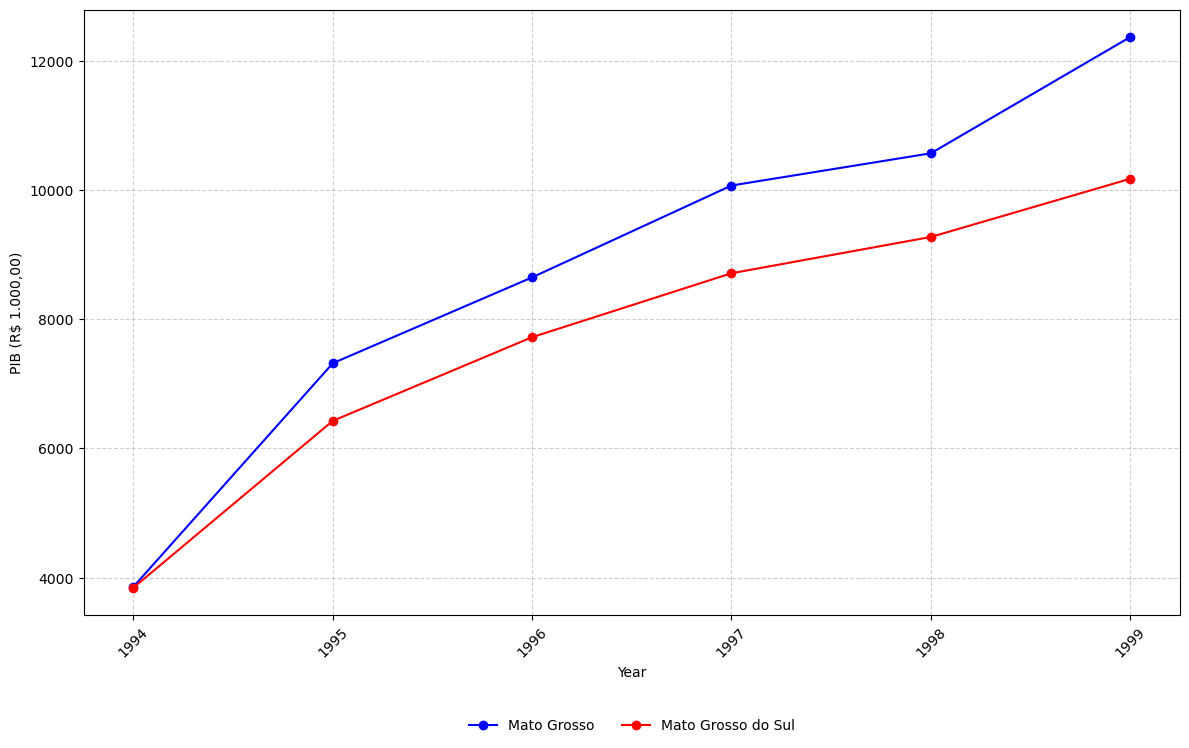

In [9]:
# Create the plot
plt.figure(figsize=(12, 8)) # Increased height slightly for the legend

# Define the colors for each state
color_map = {
    'Mato Grosso': 'blue',
    'Mato Grosso do Sul': 'red'
}

# Plot data for each state
for state in states_to_plot:
    df_state = df_long[df_long['Estado'] == state]
    # Plot PIB divided by 1000 and use the specified color
    plt.plot(df_state['Ano'], df_state['PIB'] / 1000,
             marker='o',
             linestyle='-',
             label=state,
             color=color_map.get(state, 'black')) # .get provides a default color

# Set labels and title
plt.xlabel('Year')
plt.ylabel('PIB (R$ 1.000,00)') # Updated Y-axis label

# Place the legend below the plot
# loc='upper center' places the legend's top-center point at the coordinates
# specified by bbox_to_anchor. A negative y-value in bbox_to_anchor moves it down.
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(states_to_plot), frameon=False)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.05, 1, 1]) # Adjust layout to make room for the legend

# Save the figure with high resolution
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Graph_GDP(MT-MS).jpg"
plt.savefig(save_path, dpi=1800, bbox_inches='tight', format='jpg')
print(f"Graph saved to: {save_path}")

plt.show()
